# Week 4 Probability 
Team Superb
* Aakash
* Amanda
* Aaron
* Sara

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("SBA/SBAcase.11.13.17.csv")
df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


## Default

In [45]:
prob_default = df["Default"].sum()/df["Default"].count()
# prob_default = df["Default"].mean()
prob_default


0.3263558515699334

In [31]:
prob_loan_paid_full = 1 - prob_default

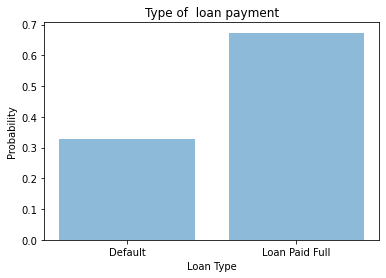

In [32]:
objects = ("Default", "Loan Paid Full")
prob = [prob_default, prob_loan_paid_full]
y_pos = np.arange(len(objects))

plt.bar(y_pos, prob, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.xlabel('Loan Type')
plt.title('Type of  loan payment')

plt.show()


These are marginal probabilities.

## Conditional Probability

In [33]:
df_default_new = df[(df.Default == 1) & (df.NewExist == 2)]
df_new = df[(df.NewExist == 2)]
cond_prob_def_new = len(df_default_new)/len(df_new)
cond_prob_def_new

0.345679012345679

In [34]:
df_default_existing = df[(df.Default == 1) & (df.NewExist == 1)]
df_existing = df[(df.NewExist == 1)]
cond_prob_def_existing = len(df_default_existing)/len(df_existing)
cond_prob_def_existing

0.32319819819819817

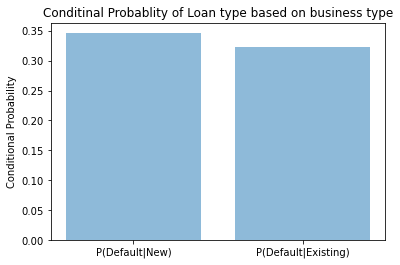

In [35]:
objects = ["P(Default|New)", "P(Default|Existing)"]
prob = [cond_prob_def_new, cond_prob_def_existing]
y_pos = np.arange(len(objects))

plt.bar(y_pos, prob, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.ylabel('Conditional Probability')
plt.title('Conditinal Probablity of Loan type based on business type')
plt.show()



## Numeric Variables

In [51]:
df_charge_off = df[(df.Default == 1)]["ChgOffPrinGr"]
df_charge_off.describe()

count    6.860000e+02
mean     6.122140e+04
std      1.221802e+05
min      1.610000e+02
25%      1.713800e+04
50%      3.306050e+04
75%      4.979050e+04
max      1.509550e+06
Name: ChgOffPrinGr, dtype: float64

<AxesSubplot:title={'center':'Distribution of Charge Off amount'}, xlabel='Charge Off amount', ylabel='Count'>

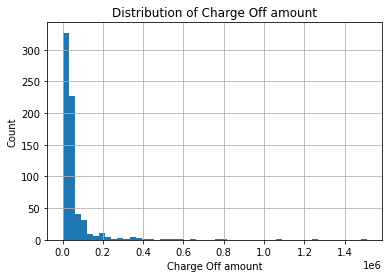

In [54]:
plt.xlabel("Charge Off amount")
plt.ylabel("Count")
plt.title("Distribution of Charge Off amount")
df_charge_off.hist(bins=50)

In [55]:
len(df[(df.ChgOffPrinGr > 0) & (df.Default == 1) & (df.NewExist == 2)]) / len(df_default_new)

1.0

In [56]:
len(df[(df.ChgOffPrinGr > 0) & (df.Default == 1) & (df.NewExist == 1)]) / len(df_default_existing)

1.0